# Prime numbers

- Profiling and optimized implementation in Numba, >1000x faster!

- Why do prime numbers make these spirals? | Dirichlet’s theorem and pi approximations


<a href="https://colab.research.google.com/github/Ziaeemehr/workshop_hpcpy/blob/main/notebooks/numba/prime_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [ ]:
import os
import sys

# Check if running on Google Colab
try:
    from google.colab import drive
    IN_COLAB = True
    print("Running on Google Colab")
except ImportError:
    IN_COLAB = False
    print("Running locally")

# Clone repository if on Colab and not already cloned
if IN_COLAB:
    if not os.path.exists('/content/workshop_hpcpy'):
        print("Cloning workshop_hpcpy repository...")
        os.system('git clone https://github.com/Ziaeemehr/workshop_hpcpy.git /content/workshop_hpcpy')
    
    # Change to notebook directory
    os.chdir('/content/workshop_hpcpy/notebooks/numba')
    print(f"Working directory: {os.getcwd()}")

Pure python implementation

In [ ]:
import webbrowser
webbrowser.open("https://www.youtube.com/watch?v=EK32jo7i5LQ")

True

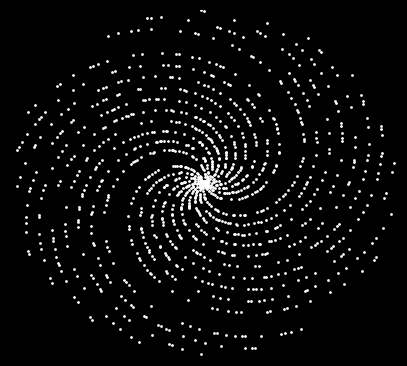

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def get_prime_numbers_py(upperbound):
    r = [x for x in range(2, upperbound) if 
                 all(x%i for i in range(2,x))]
    
    return r

def plot_numbers(numbers, upperbound, ax, s=1):
    # Vectorized computation of Cartesian coordinates
    angles = numbers  # Use prime numbers as angles
    radii = numbers   # Use prime numbers as radii
    x = radii * np.cos(angles)  # x = r * cos(theta)
    y = radii * np.sin(angles)  # y = r * sin(theta)
    
    ax.scatter(x, y, color='w', s=s)
    ax.set_xlim(-upperbound, upperbound)
    ax.set_ylim(-upperbound, upperbound)
    ax.set_axis_off()    
    
upperbound = 10000
prime_numbers = get_prime_numbers_py(upperbound)
fig, ax = plt.subplots(1, figsize=(5, 4.5), facecolor='black')
plot_numbers(prime_numbers, upperbound, ax)

- Optimizing the functions

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

@njit
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(np.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

@njit
def get_prime_numbers_nb(upperbound):
    primes = []
    for x in range(2, upperbound):
        if is_prime(x):
            primes.append(x)
    return primes


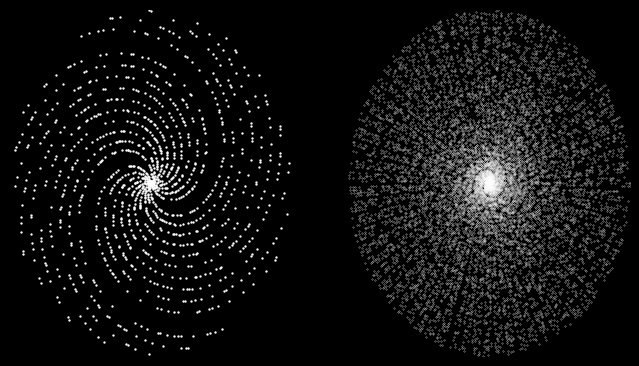

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4.5), facecolor='k')

upperbound = 10000
prime_numbers = get_prime_numbers_nb(upperbound)
plot_numbers(prime_numbers, upperbound, ax[0], s=0.5)

upperbound = 100000
prime_numbers = get_prime_numbers_nb(upperbound)
plot_numbers(prime_numbers, upperbound, ax[1], s=0.05)
plt.show()

In [14]:
upperbound = 10_000
%timeit get_prime_numbers_py(upperbound)
%timeit get_prime_numbers_nb(upperbound)

291 ms ± 2.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
491 μs ± 5.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
491 μs ± 5.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [15]:
upperbound = 30_000
%timeit get_prime_numbers_py(upperbound)
%timeit get_prime_numbers_nb(upperbound)

2.38 s ± 54.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.19 ms ± 97.9 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.19 ms ± 97.9 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
import timeit
from rich.console import Console
from rich.table import Table

console = Console()

# Create a table for the results
table = Table(title="Numba Speedup Comparison")
table.add_column("Upperbound", justify="right", style="cyan", no_wrap=True)
table.add_column("Python Time (s)", justify="right", style="magenta")
table.add_column("Numba Time (s)", justify="right", style="green")
table.add_column("Speedup", justify="right", style="bold red")

num_runs = 10

# Measure for upperbound = 10,000
upperbound = 10_000
time_py = timeit.timeit(lambda: get_prime_numbers_py(upperbound), number=num_runs)
time_nb = timeit.timeit(lambda: get_prime_numbers_nb(upperbound), number=num_runs)
speedup = time_py / time_nb
table.add_row(str(upperbound), f"{time_py/num_runs:.4f}", f"{time_nb/num_runs:.4f}", f"{speedup:.2f}x")

# Measure for upperbound = 30,000
upperbound = 30_000
time_py = timeit.timeit(lambda: get_prime_numbers_py(upperbound), number=num_runs)
time_nb = timeit.timeit(lambda: get_prime_numbers_nb(upperbound), number=num_runs)
speedup = time_py / time_nb
table.add_row(str(upperbound), f"{time_py/num_runs:.4f}", f"{time_nb/num_runs:.4f}", f"{speedup:.2f}x")

# Print the table
console.print(table)

                  Numba Speedup Comparison                  
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Upperbound ┃ Python Time (s) ┃ Numba Time (s) ┃  Speedup ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│      10000 │          0.2993 │         0.0005 │  574.57x │
│      30000 │          2.3986 │         0.0022 │ 1082.34x │
└────────────┴─────────────────┴────────────────┴──────────┘

In [ ]:
# install line_profiler
# ! pip install line_profiler -q

In [16]:
%load_ext line_profiler

In [17]:
%lprun -f get_prime_numbers_py get_prime_numbers_py(10_000)

Timer unit: 1e-09 s

Total time: 2.88743 s
File: /tmp/ipykernel_1370227/3032063312.py
Function: get_prime_numbers_py at line 5

Line #      Hits         Time  Per Hit   % Time  Line Contents
     5                                           def get_prime_numbers_py(upperbound):
     6         1 2887425773.0 2.89e+09    100.0      r = [x for x in range(2, upperbound) if 
     7                                                            all(x%i for i in range(2,x))]
     8                                           
     9         1        403.0    403.0      0.0      return r

In [23]:
%lprun -f get_prime_numbers_nb get_prime_numbers_nb(10_000)

Timer unit: 1e-09 s

Total time: 0 s
File: /tmp/ipykernel_1370227/2101669563.py
Function: get_prime_numbers_nb at line 14

Line #      Hits         Time  Per Hit   % Time  Line Contents
    14                                           @njit
    15                                           def get_prime_numbers_nb(upperbound):
    16                                               primes = []
    17                                               for x in range(2, upperbound):
    18                                                   if is_prime(x):
    19                                                       primes.append(x)
    20                                               return primes